### Import Libraries

In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from io import StringIO
from IPython.display import display, HTML

warnings.filterwarnings("ignore")
%matplotlib inline

<!--  -->

### Sample Data

In [78]:
company_sales_data = """
no_of_sales,revenue
10,1000
15,1400
18,1800
22,2400
26,2600
30,2800
5,700
31,2900
"""

In [79]:
df = pd.read_table(StringIO(company_sales_data), sep=",")
df

,no_of_sales,revenue
0,10,1000
1,15,1400
2,18,1800
3,22,2400
4,26,2600
5,30,2800
6,5,700
7,31,2900


<!--  -->

### EDA

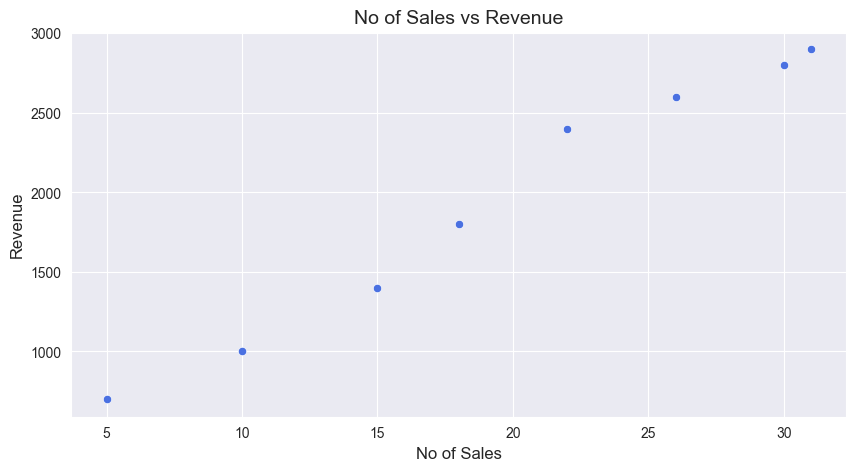

In [156]:
sns.set_style("dark")

fig, axes = plt.subplots(1, 1, figsize=(10,5))
sns.scatterplot(x="no_of_sales", y="revenue", data=df, ax=axes, color="royalblue", alpha=0.95, markers=18)
axes.set_title("No of Sales vs Revenue", fontsize=14)
axes.set_xlabel("No of Sales", fontsize=12)
axes.set_ylabel("Revenue", fontsize=12)

plt.grid(True)
plt.show()

<!--  -->

### Required Functions

In [148]:
def get_mean(arr):
    '''
    Mean is the average of the data
    '''
    return np.sum(arr) / len(arr)

def get_variance(arr, mean):
    '''
    Variance is to give how much data points are spread away from the mean
    '''
    return np.sum((arr-mean)**2)

def get_covariance(x_arr, x_mean, y_arr, y_mean):
    '''
    Covariance is a measure of relationship between 2 variables that is scale dependent, meaning there is no limit between -1 to 1.
    '''
    final_arr = (x_arr - x_mean) * (y_arr - y_mean)
    return np.sum(final_arr) 

def get_coefficients(x_arr, y_arr):
    '''
    Regression Equation: y = mx + c
    # m(slope/coefficient/weight) = cov(x, y) / var(x)
    # c(constant/intercept/bias) = y - m*x
    '''    
    x_mean = get_mean(x_arr)
    y_mean = get_mean(y_arr)
    m = get_covariance(x_arr, x_mean, y_arr, y_mean) / get_variance(x_arr, x_mean)
    c = y_mean - m * x_mean
    return round(m,2), round(c,2)

def mse(true,pred):
    ''' 
    Calculate MSE value
    '''    
    return np.mean((pred-true)**2)

def rmse(true,pred):
    ''' 
    Calculate RMSE value
    '''
    return mse(true,pred)**0.5

def r_squared(true,pred):
    ''' 
    Calculate r_squared value
    '''    
    true_mean=true.mean()
    pred_mean=pred.mean()
    tot=((true-true_mean)**2).sum(axis=0)
    obs=((true-pred)**2).sum(axis=0)
    return 1-(obs/tot)

<!--  -->

### Train Model

In [121]:
df_train = df.loc[:len(df)-3]

# Get model coefficients
slope, y_intercept = get_coefficients(df_train["no_of_sales"], df_train["revenue"])
print(df_train)
print(f"slope: {slope}, y_intercept:{y_intercept}")

   no_of_sales  revenue
0           10     1000
1           15     1400
2           18     1800
3           22     2400
4           26     2600
5           30     2800
slope: 95.97, y_intercept:64.6


<!--  -->

### Predictions

In [124]:
df_test = df.iloc[-3:]
print(df_test)
predictions = [(slope*x + y_intercept) for x in df_test.no_of_sales.tolist()]
print(f"predictions --> {predictions}")

   no_of_sales  revenue
5           30     2800
6            5      700
7           31     2900
predictions --> [2943.7, 544.45, 3039.67]


<!--  -->

### Model Evaluation

- Visual

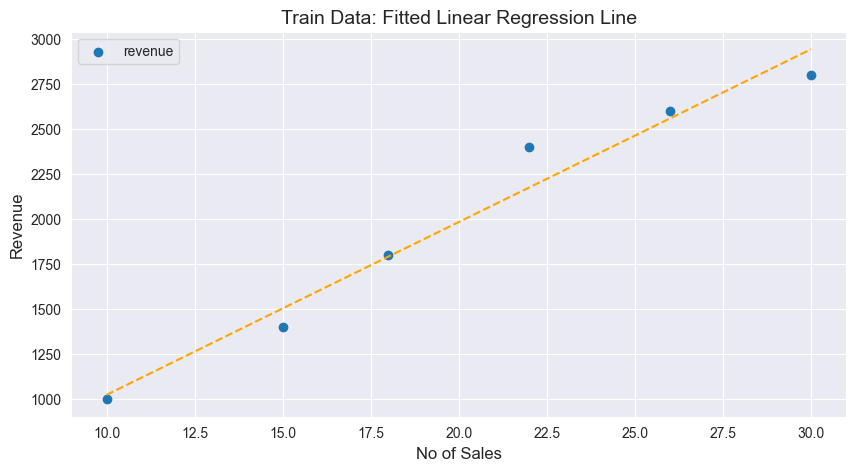

In [157]:
sns.set_style("dark")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.scatter("no_of_sales", "revenue", data=df_train)
df_train["training_fitted_line"] = [(slope*x + y_intercept) for x in df_train.no_of_sales.tolist()]
ax = sns.lineplot(x="no_of_sales", y="training_fitted_line", data=df_train, color = "orange")
ax.lines[0].set_linestyle("--")
ax.set_title("Train Data: Fitted Linear Regression Line", fontsize=14)
ax.set_xlabel("No of Sales", fontsize=12)
ax.set_ylabel("Revenue", fontsize=12)

plt.grid(True)
plt.show()

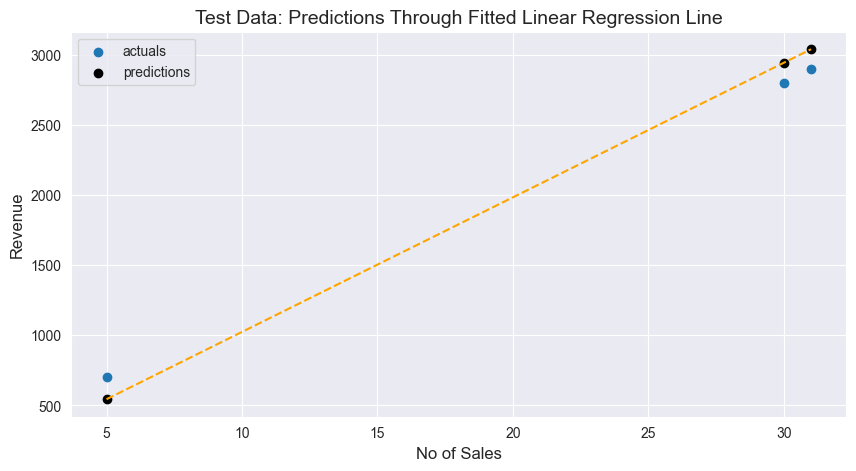

In [159]:
sns.set_style("dark")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
plt.scatter("no_of_sales", "revenue", data=df_test, label="actuals")
df_test["predictions"] = predictions
plt.scatter("no_of_sales", "predictions", data=df_test, color="black")
ax = sns.lineplot(x="no_of_sales", y="predictions", data=df_test, color = "orange")
ax.lines[0].set_linestyle("--")
ax.set_title("Test Data: Predictions Through Fitted Linear Regression Line", fontsize=14)
ax.set_xlabel("No of Sales", fontsize=12)
ax.set_ylabel("Revenue", fontsize=12)

plt.grid(True)
plt.show()

- Metrics

In [152]:
# RMSE
round(rmse(df_test["revenue"],df_test["predictions"]),2)

146.46

- `Observation`
  - Actual values are located 147.82 units away from the predicted values on a average.

In [155]:
# R Sqaured
round(r_squared(df_test["revenue"],df_test["predictions"]),2)

0.98

- `Observation`
  - Model is able to observe 98% of the total variability of the data set.

### Take Aways

- This is simple example with sample data, to understand linear regression parameters
- But in more complex real business data, we need take care about preprocessing, assumptions, model tuning and evaluating model performance in much more detail.